**1. Import Library**

In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
plt.style.use('seaborn')

**2. Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
titanic = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/indonesian ai/tugas week 1/titanic.csv')

**3. Describe Data**

In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
# Ganti nama kolom
ganti_kolom = {'Siblings/Spouses Aboard' : 'SSA', 
               'Parents/Children Aboard' : 'PCA'}
titanic.rename(ganti_kolom, axis = 1, inplace=True)

In [ ]:
# Tambah 1 kolom (Status) berdasarkan survived
# Jika 1 > Status = Survived
# Jika 0 > Status = Unsurvived
titanic.loc[titanic['Survived']==1,'Status']='Survived'
titanic.loc[titanic['Survived']==0,'Status']='Unsurvived'

In [ ]:
titanic.head()

In [ ]:
titanic.info()

In [ ]:
titanic.describe()

**4. Data Visualization**

**4.1 One Variable**

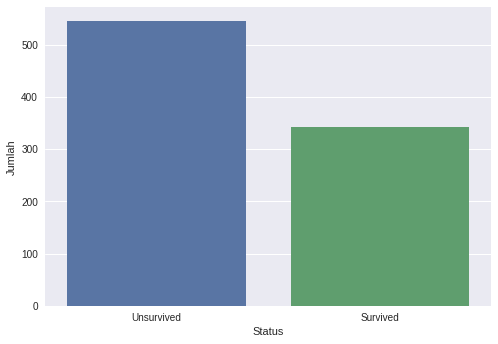

Status
Unsurvived    545
Survived      342
dtype: int64

In [ ]:
#Berapa banyak penumpang yg survived?
sns.countplot(data = titanic, x = 'Status')
plt.ylabel('Jumlah')
plt.show()

titanic.value_counts('Status')

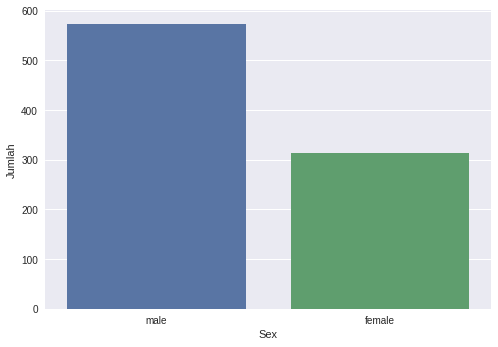

Sex
male      573
female    314
dtype: int64

In [ ]:
#Berapa banyak jumlah penumpang laki2 dan perempuan?
sns.countplot(data = titanic, x = 'Sex')
plt.ylabel('Jumlah')
plt.show()

titanic.value_counts('Sex')

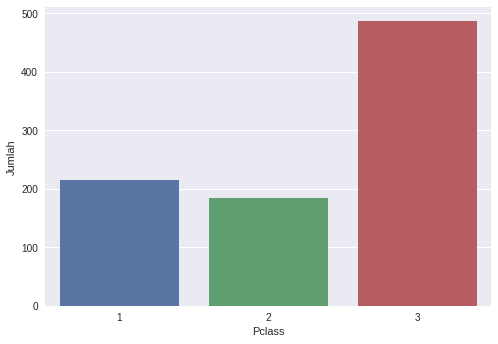

Pclass
3    487
1    216
2    184
dtype: int64

In [ ]:
#Berapa banyak jumlah penumpang untuk masing2 kelas
sns.countplot(data = titanic, x = 'Pclass')
plt.ylabel('Jumlah')
plt.show()

titanic.value_counts('Pclass')

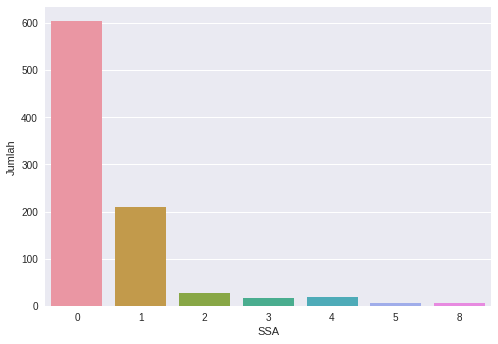

SSA
0    604
1    209
2     28
4     18
3     16
8      7
5      5
dtype: int64

In [ ]:
#Berapa jumlah saudara kandung/pasangan yang dibawa
sns.countplot(data = titanic, x = 'SSA')
plt.ylabel('Jumlah')
plt.show()

titanic.value_counts('SSA')

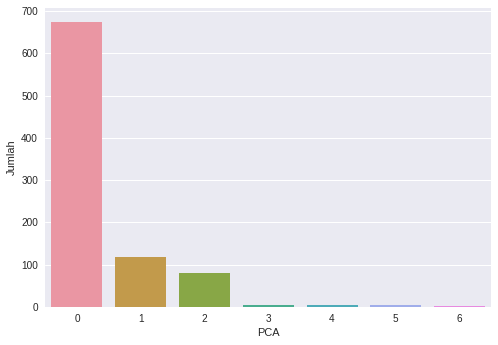

PCA
0    674
1    118
2     80
5      5
3      5
4      4
6      1
dtype: int64

In [ ]:
#Berapa jumlah orang tua/anak yang dibawa
sns.countplot(data = titanic, x = 'PCA')
plt.ylabel('Jumlah')
plt.show()

titanic.value_counts('PCA')

In [ ]:
# Buat kolom baru dengan nama "Travel Buddy" berdasarkan kondisi dari kolom SSA dan PCA

titanic.loc[(titanic['SSA'] == 0) & (titanic['PCA'] == 0), 'Travel Buddy'] = 'Sendiri'
titanic.loc[(titanic['SSA'] > 0) & (titanic['PCA'] == 0), 'Travel Buddy'] = 'Bawa Sdr/Psgn'
titanic.loc[(titanic['SSA'] == 0) & (titanic['PCA'] > 0), 'Travel Buddy'] = 'Bawa Ortu/Anak'
titanic.loc[(titanic['SSA'] > 0) & (titanic['PCA'] > 0), 'Travel Buddy'] = 'Bawa Sdr/Psgn & Ortu/Anak'

In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SSA,PCA,Fare,Status,Travel Buddy
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,Unsurvived,Bawa Sdr/Psgn
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,Survived,Bawa Sdr/Psgn
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,Survived,Sendiri
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,Survived,Bawa Sdr/Psgn
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,Unsurvived,Sendiri


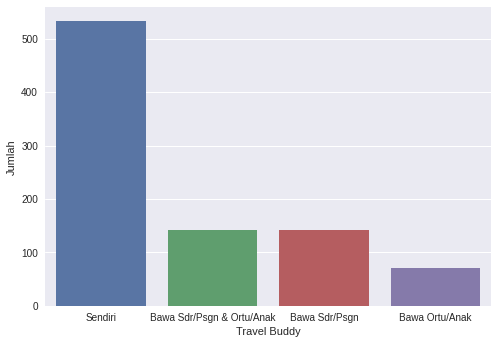

,Travel Buddy,size
0,Bawa Ortu/Anak,71
1,Bawa Sdr/Psgn,141
2,Bawa Sdr/Psgn & Ortu/Anak,142
3,Sendiri,533


In [ ]:
#Berapa banyak jumlah penumpang yang pergi sendiri? Bawa sdr/pasangan? Bawa ortu/anak? Atau bawa sdr/pasangan dan ortu/anak?
sns.countplot(data = titanic, x = 'Travel Buddy', order = titanic['Travel Buddy'].value_counts().index)
plt.ylabel('Jumlah')
plt.show()

titanic.groupby('Travel Buddy', as_index = False).size()

In [ ]:
# Ubah tipe data 'Age' dari float ke integer

titanic['Age']=titanic['Age'].astype('int64')

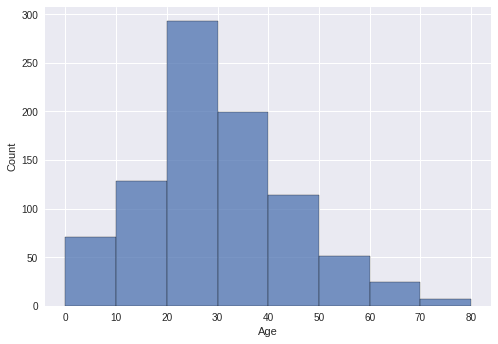

In [ ]:
# Bagaimana persebaran umur penumpang?
sns.histplot(titanic, x = 'Age', bins = 8)
plt.show()

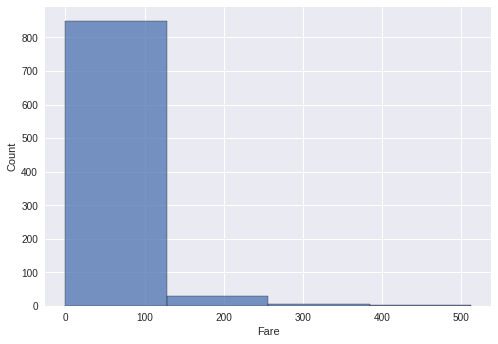

In [ ]:
# Bagaimana persebaran nilai fare penumpang?
sns.histplot(titanic, x = 'Fare', bins = 4)
plt.show()

In [ ]:
# Mengubah kolom Age dari numerikal jadi kategorikal data
# 0 - 5 = balita
# 6 - 12 = anak
# 13 - 21 = remaja
# 22 - 45 = dewasa
# 46 - 80 = orang tua
Category = pd.cut(titanic.Age, bins = [0,5,12,21,45,80], labels=['Balita', 'Anak', 'Remaja', 'Dewasa', 'Orang Tua'])
titanic.insert(5,'Category',Category)

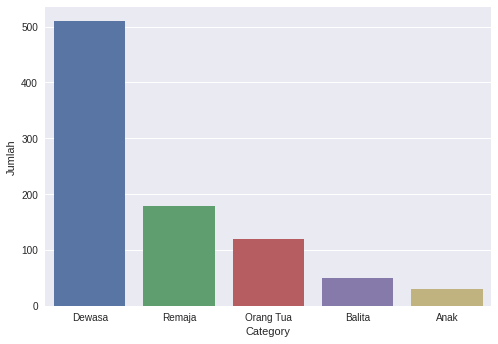

Dewasa       510
Remaja       178
Orang Tua    120
Balita        49
Anak          30
Name: Category, dtype: int64

In [ ]:
#Berapa jumlah penumpang berdasarkan kategori umur penumpang?
sns.countplot(data = titanic, x = 'Category', order = titanic['Category'].value_counts().index)
plt.ylabel('Jumlah')
plt.show()

titanic['Category'].value_counts()

**4.2 Two Variable**

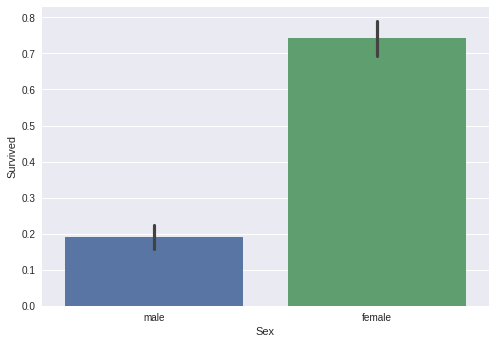

,Sex,Survived
0,female,0.742038
1,male,0.190227


In [ ]:
# Berapa rata2 survived berdasarkan jenis kelamin penumpang?
sns.barplot(x = 'Sex', y = 'Survived', data = titanic)
plt.show()

titanic[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

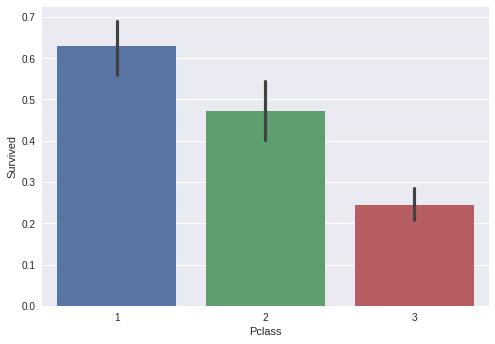

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.244353


In [ ]:
# Berapa rata2 survived berdasarkan kelas tiket penumpang?
sns.barplot(x = 'Pclass', y = 'Survived', data = titanic)
plt.show()

titanic[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by = 'Survived', ascending = False)

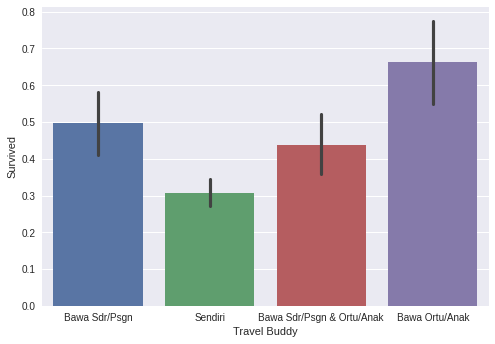

,Travel Buddy,Survived
0,Bawa Ortu/Anak,0.661972
1,Bawa Sdr/Psgn,0.496454
2,Bawa Sdr/Psgn & Ortu/Anak,0.436620
3,Sendiri,0.305816


In [ ]:
# Berapa rata2 survived berdasarkan travel buddy penumpang?
sns.barplot(x = 'Travel Buddy', y = 'Survived', data = titanic)
plt.show()

titanic[['Travel Buddy', 'Survived']].groupby('Travel Buddy', as_index=False).mean().sort_values('Survived', ascending = False)

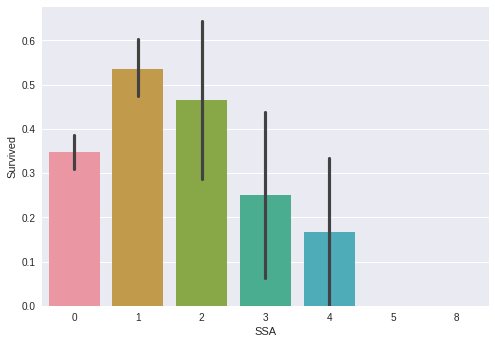

,SSA,Survived
0,0,0.347682
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
# Berapa rata2 survived berdasarkan jumlah saudara/pasangan dalam kapal?
sns.barplot(x = 'SSA', y = 'Survived', data = titanic)
plt.show()

titanic[['SSA', 'Survived']].groupby('SSA', as_index=False).mean()

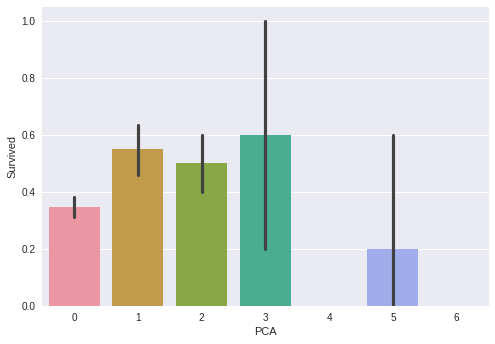

,PCA,Survived
0,0,0.345697
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [ ]:
# Berapa rata2 survived berdasarkan jumlah ortu/anak dalam kapal?
sns.barplot(x = 'PCA', y = 'Survived', data = titanic)
plt.show()

titanic[['PCA', 'Survived']].groupby('PCA', as_index=False).mean()

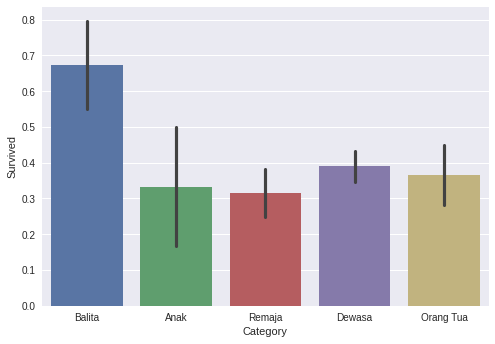

,Survived
Category,
Balita,0.673469
Dewasa,0.390196
Orang Tua,0.366667
Anak,0.333333
Remaja,0.314607


In [ ]:
# Berapa rata2 survived berdasarkan kategori umur penumpang?
sns.barplot(data = titanic, x = 'Category', y = 'Survived')
plt.show()

titanic[['Category', 'Survived']].groupby('Category').mean().sort_values('Survived', ascending=False)

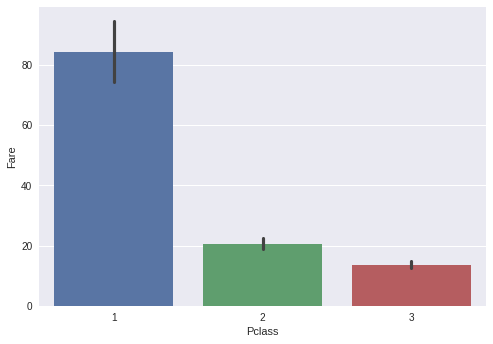

In [ ]:
# Berapa rata2 nilai fare berdasarkan kelas tiket penumpang?
sns.barplot(data = titanic, x='Pclass', y = 'Fare')
plt.show()

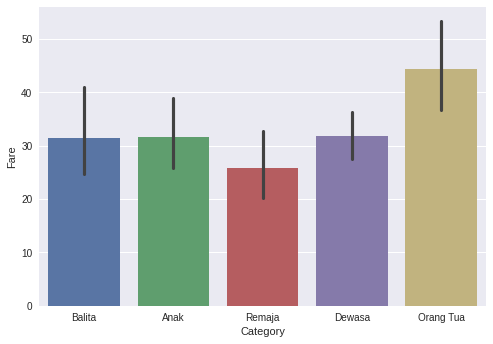

In [ ]:
# Berapa rata2 nilai fare berdasarkan kategori umur penumpang?
sns.barplot(data = titanic, x = 'Category', y = 'Fare')
plt.show()

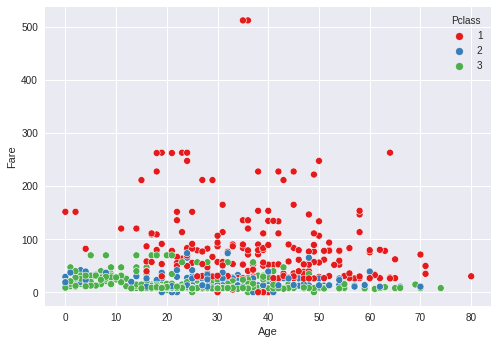

In [ ]:
# Bagaimana hubungan antara umur dan fare dilihat berdasarkan kelas tiket penumpang?
sns.scatterplot(data = titanic, x = 'Age', y = 'Fare', hue = 'Pclass', palette = 'Set1')
plt.show()

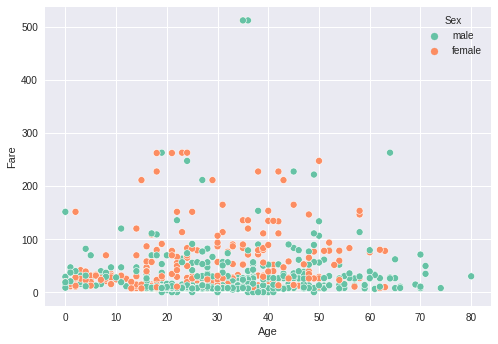

In [ ]:
# Bagaimana hubungan antara umur dan fare dilihat berdasarkan jenis kelamin penumpang?
sns.scatterplot(data = titanic, x = 'Age', y = 'Fare', hue = 'Sex', palette = 'Set2')
plt.show()

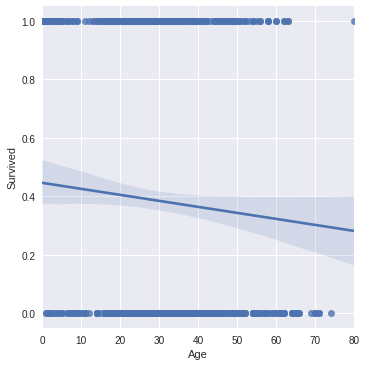

In [ ]:
# Bagaimana hubungan antara umur dan nilai survived?
sns.lmplot(data = titanic, x = 'Age', y = 'Survived')
plt.show()

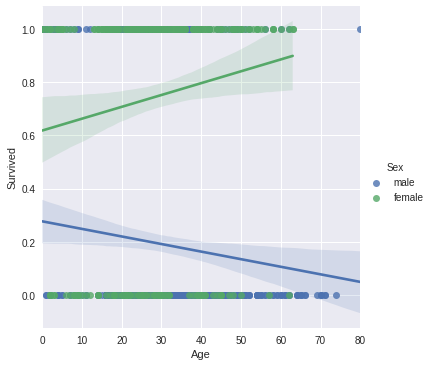

In [ ]:
# Bagaimana hubungan antara umur dan nilai survived dilihat berdasarkan jenis kelamin?
sns.lmplot(data = titanic, x = 'Age', y = 'Survived', hue = 'Sex')
plt.show()

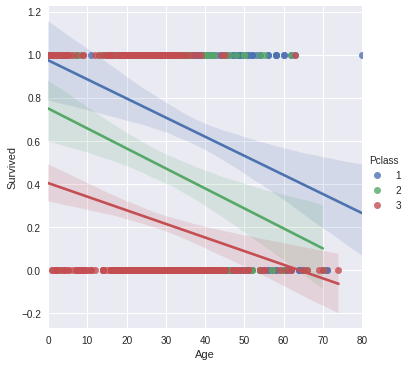

In [ ]:
# Bagaimana hubungan antara umur dan nilai survived dilihat berdasarkan kelas tiket penumpang?
sns.lmplot(data = titanic, x = 'Age', y = 'Survived', hue = 'Pclass')
plt.show()

**4.3 Box Plot**

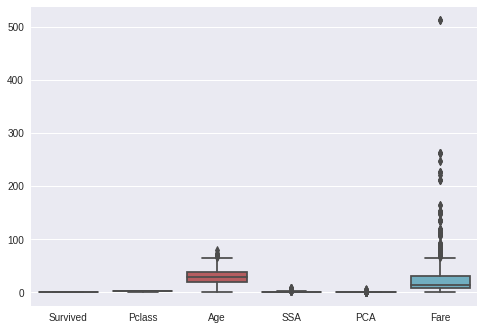

In [ ]:
# Boxplot dari masing2 variabel pada data titanic
sns.boxplot(data = titanic)
plt.show()

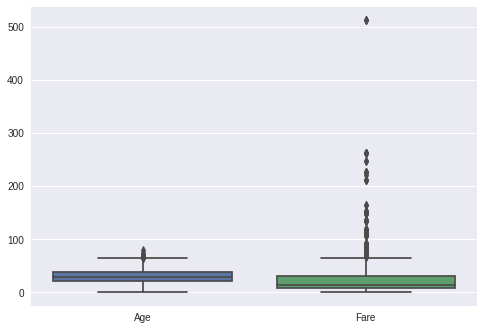

In [ ]:
# Boxplot dari variabel age dan fare
sns.boxplot(data = titanic[['Age', 'Fare']])
plt.show()

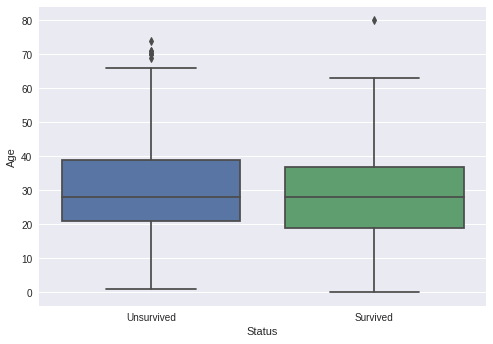

In [ ]:
# Boxplot kolom Status dilihat dari umur penumpang
sns.boxplot(data = titanic, x = 'Status', y ='Age')
plt.show()

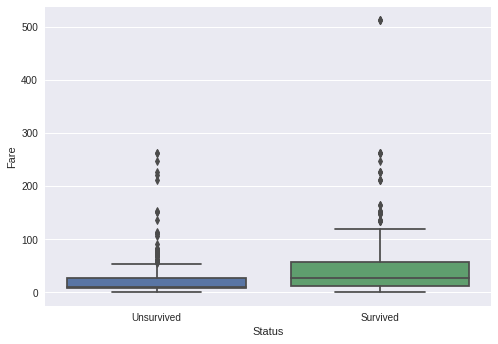

In [ ]:
# Boxplot kolom Status dilihat dari nilai fare penumpang
sns.boxplot(data = titanic, x = 'Status', y ='Fare')
plt.show()

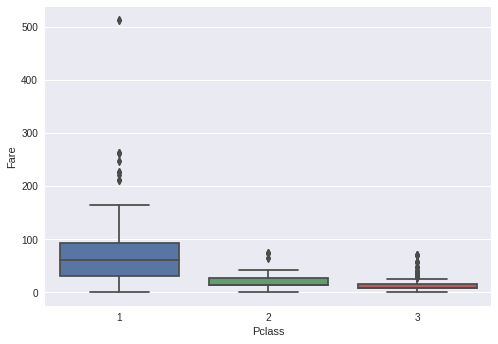

In [ ]:
# Boxplot kolom Pclass dilihat dari nilai fare penumpang
sns.boxplot(data = titanic, x = 'Pclass', y ='Fare')
plt.show()

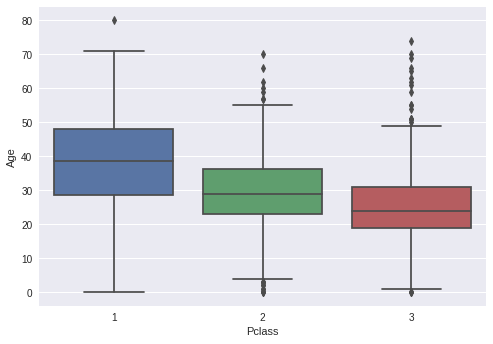

In [ ]:
# Boxplot kolom Pclass dilihat dari nilai umur penumpang
sns.boxplot(data = titanic, x = 'Pclass', y ='Age')
plt.show()

**4.4 Multi variable - Pair plot**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


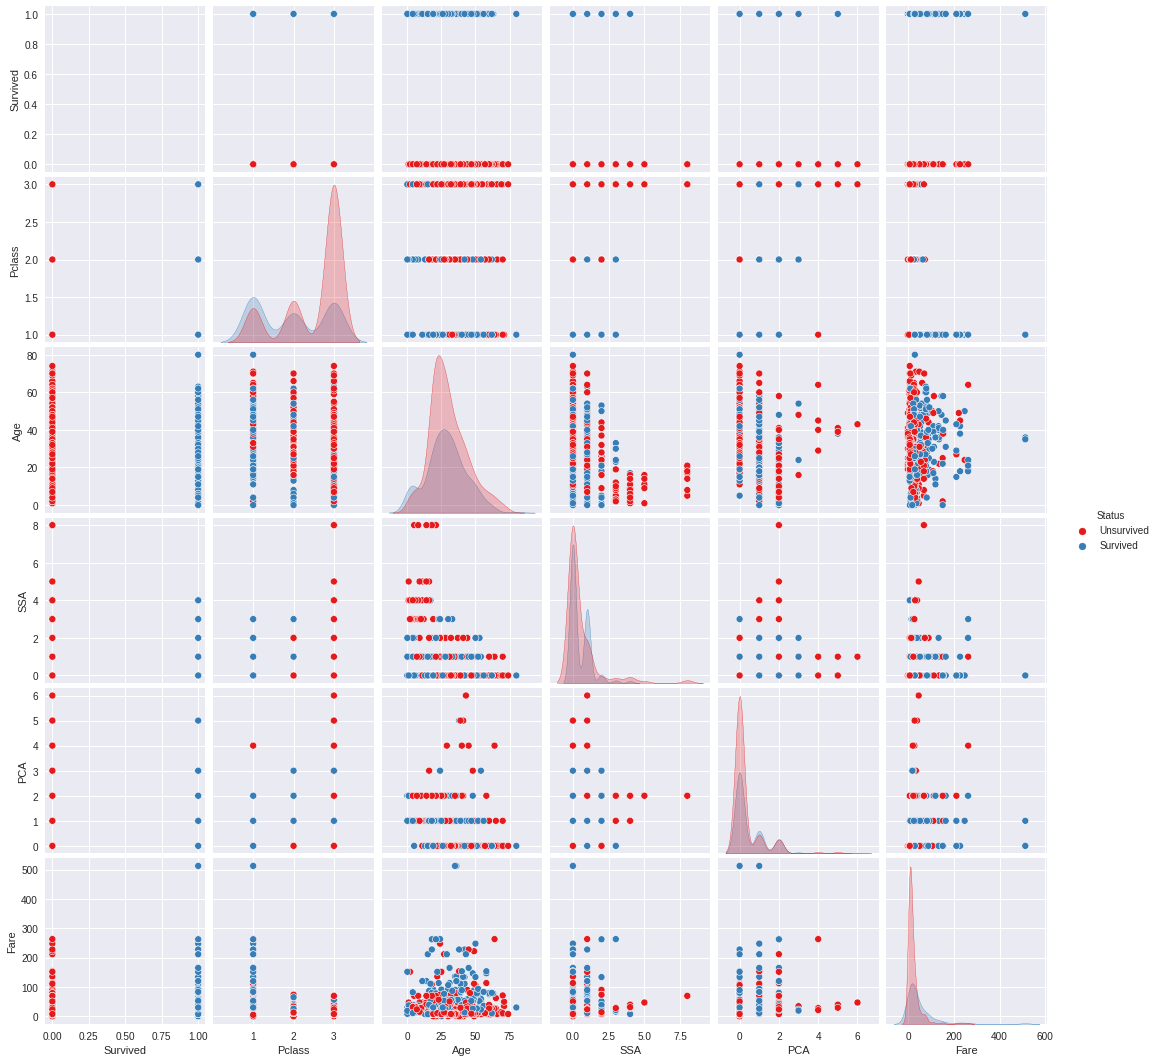

In [ ]:
sns.pairplot(data = titanic, hue = 'Status', palette = 'Set1')
plt.show()

**4.5 Heat Map**

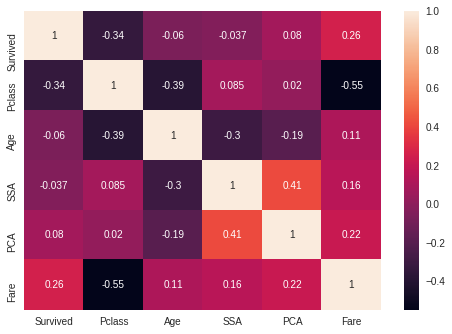

In [ ]:
sns.heatmap(titanic.corr(), annot=True)
plt.show()